# Markov Decision Process

## Section 1: Introduction

In this section, we will introduce the concepts of MDP, Q-values, and V-values. These concepts are fundamental to the field of AI and machine learning, as they are used to model **decision-making problems** in various domains such as "robotics", "finance", and "healthcare".

MDP stands for Markov Decision Process. It is a mathematical framework for modeling decision-making problems in which the outcomes are partly random and partly under the control of a decision-maker. MDPs are defined by a set of states, a set of actions, a reward function, and a transition function. The goal is to find a policy that maximizes the expected cumulative reward over time.

Q-values and V-values are two important concepts in the context of MDPs. A Q-value represents the expected cumulative reward of taking a particular action in a particular state and following a specific policy thereafter. A V-value represents the expected cumulative reward of being in a particular state and following a specific policy thereafter. These values are used to evaluate and improve the policy of an agent in an MDP.

## Section 2: The Basics of MDPs

In this section, we will explain the basic components of an MDP.

An MDP is defined by "a set of states", "a set of actions", "a reward function", and "a transition function". The state space is the set of all possible states that the agent can be in. The action space is the set of all possible actions that the agent can take. The reward function defines the reward the agent receives for each action taken in a particular state. The transition function defines the probability of moving from one state to another state after taking a particular action.

To illustrate these concepts, let's consider an example of a **robot that needs to navigate through a maze**. The robot can be in one of several states, such as at the start of the maze, at a junction in the maze, or at the end of the maze. This robot takes an action. With Probability of **0.8** It goes in that desired direction but with probability of **0.2** It goes in the perpendicular direction (0.1, 0.1 for each)!

In an MDP, the agent interacts with the environment by selecting actions based on its current state and the expected future reward. The goal of the agent is to find a policy that maximizes the expected cumulative reward over time.

**QUESTION**

1. What are the state space, action space, reward function, and transition function of the robot in the maze example? Explain why you think each of these components is important for the robot to navigate through the maze.

Answer: The state space is all of the (i,j) cells in the maze which in here is 20cells(4*5).
The actions space is contained of four actions up,down,left and right.
The reward function in here can be if we are in terminal state the reward would be 1 else it would be a negative value like -0.02
The transition function is which with probability of t it transfers us from state1 with action A to state2.
Importance of Each:
The state space helps us to know which state we are at with a reward and helps us to find the next state we can move to.
The reward function helps the agent to findout if the next state it is going to is good or not.
The transition function helps us to know with what probability the action can be done.

2. Is our environment stochastic or deterministic? Why?!

The environment is stochastic because the agent should be worried about uncertainty of actions.

**Define The MDP**:

Based on your choice of rewards and transitions and the state space, define the MDP for the robot in the maze example. You can complete the following code to define the MDP:

In [24]:
import numpy as np
import math

# Definition of the maze
maze = np.array([[2, 0, 0, 0, 0],
                 [0, 1, 1, 0, 1],
                 [0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 3]])

print("Our Maze is: \n", maze)

# TODO: Define the states and actions

states = [] # states are from state list with 20 cells(5*4)
for i in range(4):
    for j in range(5):
        states.append((i, j))

actions = ['r', 'l', 'u', 'd'] # r means right, l means left, u means up, d means down
# TODO: Define the reward function
rewards ={'terminal':1,
         'else':-0.02
         }

def actionConverter(action):
    if action == 'r':
        next = (0, 1)
        return next
    elif action == 'l':
        next = (0, -1)
        return next
    elif action == 'u':
        next = (-1, 0)
        return next
    else:
        next = (1, 0)
        return next


def perpendicular_move(action):
    if action == 'r' or action == 'l':
        return ('u', 'd')
    else:
        return ('r', 'l')

    
    
    
def next_state_checker(state, action):
    next = actionConverter(action)
    next_state = (state[0] + next[0],state[1]+next[1])
    if next_state[0] < 0 or next_state[0] >= 4 or next_state[1] < 0 or next_state[1] >= 5:
        return False
    elif maze[next_state[0]][next_state[1]]==1:
        return False
    else:
        return True

# TODO: Define the transition probabilities

transition_prob = []
for s in states:
    for a in actions:
        s2 = (s[0] + actionConverter(a)[0], s[1] + actionConverter(a)[1])
        if next_state_checker(s, a):
            transition_prob.append((s, a, s2, 0.8))
        else:
            transition_prob.append((s, a, s, 0.8))
        for a2 in perpendicular_move(a):
            s2 = (s[0] + actionConverter(a2)[0], s[1] + actionConverter(a2)[1])
            if next_state_checker(s, a2):
                transition_prob.append((s, a2, s2, 0.1))
            else:
                transition_prob.append((s, a2, s, 0.1))


# TODO: Set the discount factor (for further use in v-value iteration and q-value iteration)
discount = 0.9

# TODO: Define the initial value function (you can simply set all to 0)
values = np.zeros((4,5))

# Define the nitial Q function (you can simply set all to 0)
q_values = np.zeros((20,4))


Our Maze is: 
 [[2 0 0 0 0]
 [0 1 1 0 1]
 [0 0 0 0 0]
 [0 1 1 1 3]]


In [7]:
#functions



def reward_action(state):
    if state[0] == 3 and state[1] == 4:
        return 1
    else:
        return -0.01


def terminal(state):
    if state[0] == 3 and state[1] == 4:
        return True
    else:
        return False




    
def next_state(current,action):
    a = actionConverter(action)
    next = (current[0]+a[0],current[1]+a[1])
    return next


def returning_max_a(s1):
    return max(q_values[s1[0] * 5 + s1[1]])
    




## Section 3: Computing V-values

In this section, we will explain how to compute V-values for an MDP using the Bellman equation.

The Bellman equation is a recursive equation that expresses the value of a state in terms of the values of its successor states. It is defined as:

$$V(s) = R(s) + \gamma * \max_a (\sum_{s'} P(s, a, s') * V(s'))$$

where V(s) is the value of state s, R(s) is the reward for being in state s, γ is the discount factor that determines the importance of future rewards, P(s, a, s') is the probability of moving from state s to state s' after taking action a, and max_a is the maximum over all possible actions a.

To compute the V-values for an MDP, we start with an initial estimate of the V-values and update them iteratively using the Bellman equation until they converge to the true values. The update rule is:

$$V(s) \leftarrow R(s) + \gamma * \max_a (\sum_{s'} P(s, a, s') * V(s'))$$

We can use dynamic programming algorithms such as value iteration or policy iteration to compute the V-values.

We can use the Bellman equation to compute the V-values for each state in the maze. The V-values represent the expected cumulative reward that the robot can obtain if it starts from that state and follows an optimal policy thereafter. Complete the code below:

(**Note:** your final result can be slightly different from the result printed below and it's okay!)

In [16]:
temp = np.zeros((4, 5))
for t in range(1000):  # calculating with t depth
    
    for s in states:
        v_list = np.zeros(4)
        for a in range(4):
            for st in transition_prob:
                if st[0] == s and st[1] == actions[a]:
                    break
            action = actions[a]
            
            a1 = perpendicular_move(action)[0]
            
            a2 = perpendicular_move(action)[1]
            reward = reward_action(s)
            if next_state_checker(s, action):
                s2 = next_state(s, action)
                v_list[a] += (values[s2[0]][s2[1]]*discount + reward) * 0.8
            else:
                s2 = s
                v_list[a] += (values[s2[0]][s2[1]]*discount + reward) * 0.8
            if next_state_checker(s, a1):
                s2 = next_state(s, a1)
                v_list[a] += (values[s2[0]][s2[1]]*discount + reward) * 0.1
            else:
                s2 = s
                v_list[a] += (values[s2[0]][s2[1]]*discount + reward) * 0.1
            if next_state_checker(s, a2):
                s2 = next_state(s, a2)
                v_list[a] += (values[s2[0]][s2[1]]*discount + reward) * 0.1
            else:
                s2 = s
                v_list[a] += (values[s2[0]][s2[1]]*discount + reward) * 0.1
            temp[s[0]][s[1]] = max(v_list)
    values = temp
            
    

# Print the V-values
print(values)



[[3.45245092 3.89143434 4.44580022 5.07716137 4.34815774]
 [3.88775126 4.55490153 5.388196   5.96625715 6.87717069]
 [4.53649687 5.34160923 6.09738829 6.95813666 8.06241836]
 [3.89600678 4.56149961 5.24127518 8.13105386 9.42087043]]


## Section 4: Computing Q-values

In this section, we will explain how to compute Q-values for an MDP using the Bellman equation.

The Q-values represent the expected cumulative reward that the robot can obtain if it starts from a particular state and takes a particular action, and then follows an optimal policy thereafter. The Q-values can be computed using the Bellman equation as follows:

$$Q(s, a) = R(s, a) + \gamma * \sum_{s'} (P(s, a, s') * \max_{a'} (Q(s', a')))$$

where Q(s, a) is the Q-value of state-action pair (s, a), R(s, a) is the reward for taking action a in state s, γ is the discount factor that determines the importance of future rewards, P(s, a, s') is the probability of moving from state s to state s' after taking action a, max_a' is the maximum over all possible actions a' in state s', and sum_s' is the sum over all possible successor states s' of state s.

To compute the Q-values for an MDP, we start with an initial estimate of the Q-values and update them iteratively using the Bellman equation until they converge to the true values. The update rule is:

$$Q(s, a) \leftarrow R(s, a) + \gamma * \sum_{s'} (P(s, a, s') * \max_{a'} (Q(s', a')))$$

We can use dynamic programming algorithms such as Q-learning or SARSA to compute the Q-values.


We can use the Q-learning algorithm to compute the Q-values for each state-action pair in the maze. The Q-values represent the expected cumulative reward that the robot can obtain if it starts from a particular state and takes a particular action, and then follows an optimal policy thereafter. Complete the code below:

(**Note:** your final result can be slightly different from the result printed below and it's okay!)

In [29]:
#computing q values
for t in range(1000):
    for s in states:
        for i in range(4):
            for transition in transition_prob:
                a = actions[i]
                if transition[0] == s and transition[1] == a:
                    a1 = perpendicular_move(a)[0]
                    a2 = perpendicular_move(a)[1]
                    r = reward_action(s)
                    if next_state_checker(s, a):
                        s2 = next_state(s, a)
                        temp = 0.8 * (r + discount*returning_max_a(s2))
                    else:
                        s2 = s
                        temp = 0.8 * (r + discount*returning_max_a(s2))
                    if next_state_checker(s, a1):
                        s2 = next_state(s, a1)
                        temp += 0.1 * (r + discount*returning_max_a(s2))
                    else:
                        s2 = s
                        temp += 0.1 * (r + discount*returning_max_a(s2))
                    if next_state_checker(s, a2):
                        s2 = next_state(s, a2)
                        temp += 0.1 * (r + discount*returning_max_a(s2))
                    else:
                        s2 = s
                        temp += 0.1 * (r + discount*returning_max_a(s2))
                    
                    q_values[s[0] * 5 + s[1]][i] = temp
                # Print the Q-values
print(q_values)

[[ 3.80220226  3.45533984  3.45533984  3.80220226]
 [ 4.28395563  3.49869764  3.85700171  3.85700171]
 [ 4.89283836  3.95515896  4.40116555  4.40116555]
 [ 4.6050567   4.6050567   4.89283836  5.58628813]
 [ 4.39355452  4.89283836  4.455965    4.455965  ]
 [ 3.85700171  3.85700171  3.49869764  4.28395563]
 [ 4.45822322  3.97646985  3.90577924  4.95305753]
 [ 5.73537983  5.20927244  4.6259745   5.81870811]
 [ 5.88090797  5.88090797  5.19102176  6.54941281]
 [ 6.58849026  5.92354898  4.77485558  7.47294237]
 [ 4.89283836  4.28395563  4.0312693   4.0312693 ]
 [ 5.73850881  4.5457752   5.15152895  5.15152895]
 [ 6.54941281  5.30062065  5.89460783  5.89460783]
 [ 7.47294237  5.96758919  6.07264068  6.73758196]
 [ 7.8885467   7.0481348   7.66111151  8.64018111]
 [ 3.90035951  3.90035951  4.28395563  3.84556007]
 [ 4.51844239  4.03668902  4.95305753  4.3875326 ]
 [ 5.22763929  5.22763929  5.73850881  5.15465793]
 [ 8.64018111  7.66111151  7.0481348   7.8885467 ]
 [ 9.8776163   9.8776163   9.02

## Section 5: Visualizing the Optimal Policy

Now that we have computed the Q-values, we can use them to find the optimal policy, which is the sequence of actions that the robot should take in each state to maximize its expected reward. We can visualize the optimal policy as arrows in a grid, where each arrow corresponds to the action with the highest Q-value in the corresponding state. Complete the code below:

(**Note:** your final result can be slightly different from the result printed below and it's okay!)

In [81]:
import matplotlib.pyplot as plt

# Compute the optimal policy

policy = np.empty((4,5), dtype=object)

for i in range(4):
    for j in range(5):
        policy[i][j] = actions[np.argmax(q_values[i*5+j])]

print(actions)
print(policy)
new = np.empty((4,5), dtype = object)
for i in range(4):
    for j in range(5):
        if policy[i][j]=='r':
            new[i][j]='>'
        elif policy[i][j]=='u':
            new[i][j]='∧'
        elif policy[i][j] == 'd':
            new[i][j] = '∨'
        else:
            new[i][j] = '<'
print(new)

['r', 'l', 'u', 'd']
[['r' 'r' 'r' 'd' 'l']
 ['d' 'd' 'd' 'd' 'd']
 ['r' 'r' 'r' 'r' 'd']
 ['u' 'u' 'u' 'r' 'd']]
[['>' '>' '>' '∨' '<']
 ['∨' '∨' '∨' '∨' '∨']
 ['>' '>' '>' '>' '∨']
 ['∧' '∧' '∧' '>' '∨']]


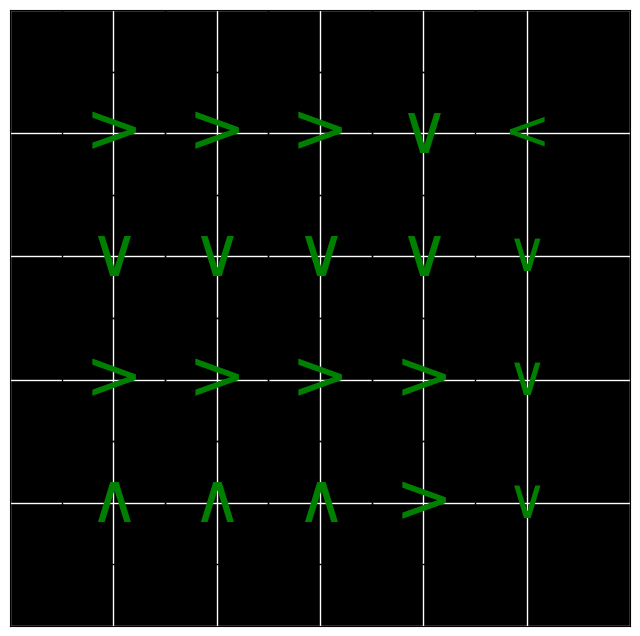

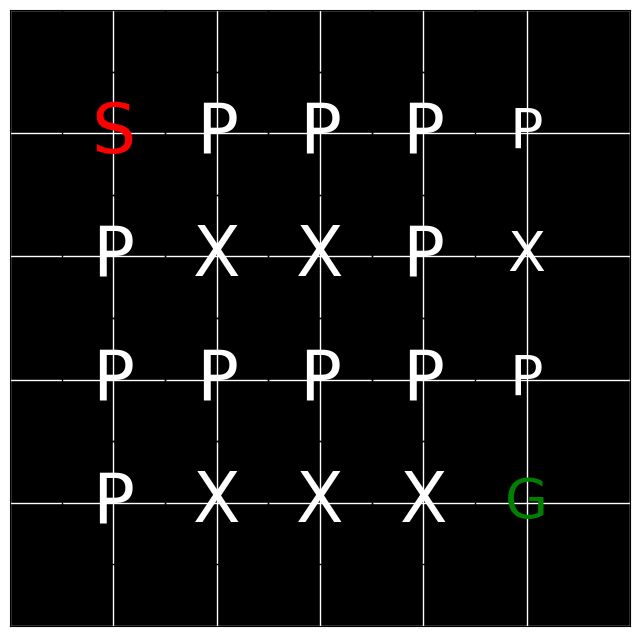

Ellipsis

In [86]:
#TODO: Visualize optimal policy as arrows
import numpy as np
import matplotlib.pyplot as plt

actions_signs = ['∨', '>', '∧', '<']

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xticks(np.arange(0, 7, 1))
ax.set_yticks(np.arange(0, 6, 1))

# add cell borders
for i in range(5):
    for j in range(4):
        rect = plt.Rectangle((j+0.5, 4.5-i), 1, 1, fill=False, color='black')
        ax.add_patch(rect)

ax.grid(color='white', linestyle='-', linewidth=1)
ax.tick_params(axis='both', which='both', length=0)
ax.set_axisbelow(True)
ax.set_facecolor("black")
index_i = 0
index_j = 0

for i in range(4, 0, -1):
    index_j = 0
    for j in range(1, 5):
        if policy[index_i][index_j] == 'd':
            ax.text(j, i, '∨', ha='center', va='center', fontsize=50, color="green")
        elif policy[index_i][index_j] == 'r':
            ax.text(j, i, '>', ha='center', va='center', fontsize=50, color="green")
        elif policy[index_i][index_j] == 'u':
            ax.text(j, i, '∧', ha='center', va='center', fontsize=50, color="green")
        elif policy[index_i][index_j] == 'l':
            ax.text(j, i, '<', ha='center', va='center', fontsize=50, color="green")
        index_j += 1
    index_i += 1

index_i = 0
for i in range(4, 0, -1):
    if policy[index_i][4] == 'd':
        ax.text(5, i, '∨', ha='center', va='center', fontsize=40, color="green")
    elif policy[index_i][4] == 'r':
        ax.text(5, i, '>', ha='center', va='center', fontsize=40, color="green")
    elif policy[index_i][4] == 'u':
        ax.text(5, i, '∧', ha='center', va='center', fontsize=40, color="green")
    elif policy[index_i][4] == 'l':
        ax.text(5, i, '<', ha='center', va='center', fontsize=40, color="green")
    index_i += 1

ax.set_yticklabels([],color="black")
ax.set_xticklabels([],color="black")

plt.show()
####################################################################


fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks(np.arange(0, 7, 1))
ax.set_yticks(np.arange(0, 6, 1))
for i in range(5):
    for j in range(4):
        rect = plt.Rectangle((j+0.5, 4.5-i), 1, 1, fill=False, color='black')
        ax.add_patch(rect)
ax.grid(color='white', linestyle='-', linewidth=1)
ax.tick_params(axis='both', which='both', length=0)
ax.set_axisbelow(True)
ax.set_facecolor("black")
index_i = 0
index_j = 0

for i in range(4, 0, -1):
    index_j = 0
    for j in range(1, 5):
        if index_i == 0 and index_j == 0:
            ax.text(j, i, 'S', ha='center', va='center', fontsize=50, color="red")
        elif maze[index_i][index_j] == 1:
            ax.text(j, i, 'X', ha='center', va='center', fontsize=50, color="white")
        elif maze[index_i][index_j] == 0:
            ax.text(j, i, 'P', ha='center', va='center', fontsize=50, color="white")
        index_j += 1
    index_i += 1
index_i = 0
for i in range(4, 0, -1):
    if index_i == 3:
        ax.text(5, i, 'G', ha='center', va='center', fontsize=40, color="green")
    elif maze[index_i][4] == 1:
        ax.text(5, i, 'X', ha='center', va='center', fontsize=40, color="white")
    elif maze[index_i][4] == 0:
        ax.text(5, i, 'P', ha='center', va='center', fontsize=40, color="white")
    index_i += 1
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

#TODO: Show the maze. show start state (S) in red, goal state(G) in green, obstacles(X) in white, and Path (P) in white
...